# Lab Model order selection

The goal of this lab session is to study different model order selection methods. You will send only one notebook for both parts.

You have to send the filled notebook named **"MOS_familyname1_familyname2.ipynb"** (groups of 2) by email to *lucca.guardiola@centralesupelec.fr* by November 26, 2020 and put **"AML-MOS"** in the subject. 

We begin with the standard imports:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

/Users/Luccaguardiola1/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/Luccaguardiola1/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Theoretical questions 

What is the expression of the AIC and BIC for a dataset $\{X_1,...X_n \}$ modeled with a GMM with $k$ mixtures after EM algorithm.

What is the expression of the AIC and BIC for a dataset $\mathcal{X} =\{(X_1,Y_1),...(X_n,Y_n) \}$ modeled with a Logistic Regression after its training on $\mathcal{X}$. Suppose we have 2 labels and X has p features

Explain briefly the concept of K-fold cross validation. 

## Application AIC/BIC

You are going apply the criterias on several datasets.

## Clustering

AIC and BIC can help to estimate the number of clusters when EM algorithm is used (because it's a probabilistic model.) 


In [12]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
from sklearn.mixture import GaussianMixture

### Task : 
- Apply GaussianMixture model using different number of mixture. 
- Choose the number of mixtures with the BIC/AIC.

Use the .bic(X) and the .aic(X) method already implemented in sklearn

## Classification

### Tasks : 
- Train logistic regression model on the dataset
- Compute AIC for this dataset


In [16]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
from sklearn.linear_model import LogisticRegression

### Does it seem to be reasonable to add a polynomial kernel as regards AIC or BIC ? 

### What would the AIC be for LDA model assuming we have the same likelihood than the previous logistic regression ? 

AIC/BIC and cross-validation are mostly used with linear Regression and logisitic regression. AIC/BIC rely on probabilistic caracterics of models in order to compute loglikelihood. 

Whereas crossvalidation can be applied in every models and give a more realistic vision of the performance of the model.


## Real Machine Learning situation

Imagine you want to develop and deploy for your job a machine learning algorithm capable of recognizing digits, in order to read automatically bank cheques or bills. 
The goal of the development phase for a data scientist is to choose the best performing model and also evaluate the most accurately the generalisation error on unseen data i.e the error the algorithm will produce when it will be operational. 
For instance in our case, an error from your algorithm will cost a certain amount of money, it's mandatory to estimate the potential financial loss induced by your model. 



In [37]:
from sklearn.datasets import load_digits
digits = load_digits()

X=digits.data
y=digits.target

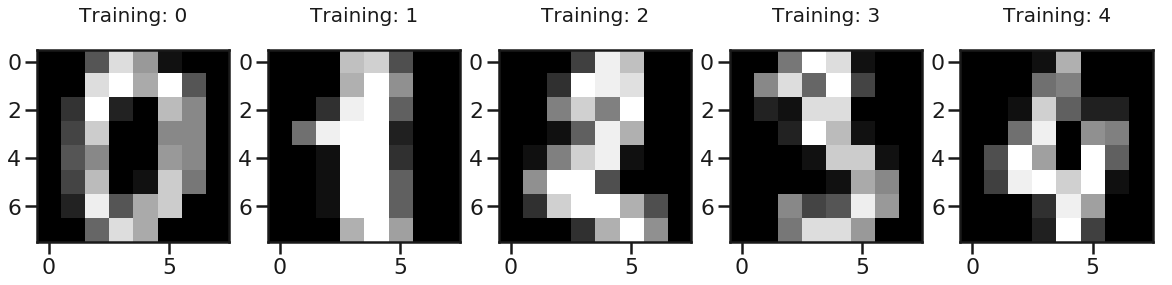

In [38]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Choose a model with Cross validation 
Cross validation provides a better estimation of the model's performance on the dataset than split train/test method. It's very useful for selecting the most accurate model. 


In [44]:
from sklearn.model_selection import cross_validate, train_test_split

### Tasks : 
- Apply cross validation to Logistic Regression and SVM, choose a C between 0.01 and 1 to add regularization
- Choose the best performing model

### Estimation of the generalization error

As we have choosen our model, we have to evaluate its future performance on unseen data. The most easy way is to use the split train/test method to have a confidence interval based on the performance of the model on the test dataset.

One could want to use cross validation for doing this estimation, however the several estimations returned by k fold cross-val don't garentee the independance of the estimations. The independence is needed for confidence intervals. This is why randomized split train/test is used.

### Tasks : 
- Split the dataset 50%/50% and fix the random state of the split_train_test
- Return the test accuracy with the choosen model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,random_state=42)


### Confidence intervals
Assume that the event to have a right classification with our model follows a bernouilli process with paramater p. 
The accuracy on the test dataset ($\hat{p}$) gives us an estimation of p. 



### Task : Make a 99% interval of confidence of the real accuracy using Central limit theorem

### Hoeffding inequality 

A non negligeable inequality for constituting confidence interval for large dataset is Hoeffding inequality which is often tighter than CLT inequality for very large dataset (our dataset is maybe not large enough)

Hoeffding’s inequality: Suppose that $\{Z_1, . . . , Z_n\}$ are independent and that, $a ≤ Z_i ≤ b$, and $E[Z_i]=z$. Then for any $t>0$,

$$ P(|\hat{Z} - z|\ge t) \le \exp \left(-\frac{2nt^2}{(b-a)^2} \right)$$ 
With $\hat{Z} = \frac{1}{n} \sum_{i=1}^n Z_i $

Apply this inequality to the test accuracy $\hat{p}$ in order to have a 99% confidence interval
